# Statistical Data Cleaning and Plotting for VETI data

VETI is Istanbul Technical University's statictical data collecting system. Sometimes we need to handle our data by ourself. VETI has this feature to export mass data. Here I'll clean and calculate my data and I will create my plot.

In [1]:
import pandas as pd

In [2]:
# Readen excell file downloaded from VETI system.
df = pd.read_excel('comp-usag-surv_Report_2019_12_11.xlsx')

In [3]:
df.head(5)

,Starting Date,1. 1. Which computer do you mostly use in your room in the faculty?
0,11/20/2019 8:52:52 AM,NaN
1,11/20/2019 12:54:22 PM,2. Desktop computer
2,11/20/2019 2:57:16 PM,NaN
3,11/20/2019 3:17:39 PM,2. Desktop computer
4,11/20/2019 3:18:00 PM,1. Laptop computer


In [4]:
# First we need to clean column names.
# Cloumn name renaming:
df=df.rename(columns={'Starting Date': 'date', '1. 1. Which computer do you mostly use in your room in the faculty?':'usage'})

In [5]:
df.head(5)

,date,usage
0,11/20/2019 8:52:52 AM,NaN
1,11/20/2019 12:54:22 PM,2. Desktop computer
2,11/20/2019 2:57:16 PM,NaN
3,11/20/2019 3:17:39 PM,2. Desktop computer
4,11/20/2019 3:18:00 PM,1. Laptop computer


In [6]:
# Here is a good data cleaning source. I'll use it without any change.
# https://gist.github.com/susanli2016/10e8bae3dc7e30c1a3485d52313f4ccf#file-text_preprocessing-py
# Removing empty entrances. Simple but very important:
df = df[~df['usage'].isnull()]

In [7]:
# Convert datetime
# https://docs.python.org/3.4/library/datetime.html
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y %I:%M:%S %p')

In [8]:
df.head(5)

,date,usage
1,2019-11-20 12:54:22,2. Desktop computer
3,2019-11-20 15:17:39,2. Desktop computer
4,2019-11-20 15:18:00,1. Laptop computer
5,2019-11-20 15:21:58,1. Laptop computer
6,2019-11-20 15:22:08,2. Desktop computer


In [9]:
# What about removing unnecessary punctation?
df['usage'] = df['usage'].str[3:]

In [10]:
df.head(5)

,date,usage
1,2019-11-20 12:54:22,Desktop computer
3,2019-11-20 15:17:39,Desktop computer
4,2019-11-20 15:18:00,Laptop computer
5,2019-11-20 15:21:58,Laptop computer
6,2019-11-20 15:22:08,Desktop computer


In [11]:
# Here is the magic command. This will summarize data to show on graphic
df.groupby('usage').count()

,date
usage,
Another,2
Desktop computer,15
Laptop computer,21


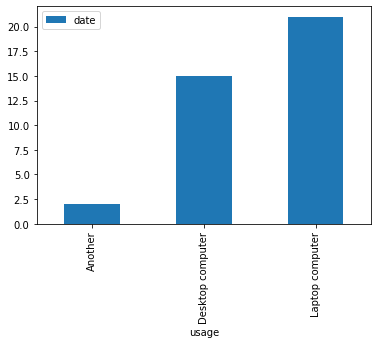

In [13]:
# Here is the first graphic.
df.groupby('usage').count().plot(kind='bar')